Populating the interactive namespace from numpy and matplotlib
-1.0*(368.64*ca**4*cb**4*lambda**9 - 2580.48*ca**4*cb**4*lambda**8 - 3945.6768*ca**4*cb**4*lambda**7*sa**2 + 4515.84*ca**4*cb**4*lambda**7 + 13809.8688*ca**4*cb**4*lambda**6*sa**2 + 5615.321088*ca**4*cb**4*lambda**5*sa**4 + 302.848*ca**3*cb**3*lambda**8*sa*sb - 2119.936*ca**3*cb**3*lambda**7*sa*sb - 3241.48309333333*ca**3*cb**3*lambda**6*sa**3*sb + 3709.888*ca**3*cb**3*lambda**6*sa*sb + 11345.1908266667*ca**3*cb**3*lambda**5*sa**3*sb + 4613.14225493334*ca**3*cb**3*lambda**4*sa**5*sb - 69.76*ca**2*cb**2*lambda**11 + 976.64*ca**2*cb**2*lambda**10 + 1119.9968*ca**2*cb**2*lambda**9*sa**2 + 373.332266666667*ca**2*cb**2*lambda**9*sb**2 - 5127.36*ca**2*cb**2*lambda**9 - 11759.9664*ca**2*cb**2*lambda**8*sa**2 - 3919.9888*ca**2*cb**2*lambda**8*sb**2 + 11963.84*ca**2*cb**2*lambda**8 - 5058.52121955556*ca**2*cb**2*lambda**7*sa**4 - 5124.32576355556*ca**2*cb**2*lambda**7*sa**2*sb**2 + 41159.8824*ca**2*cb**2*lambda**7*sa**2 + 13719.9608

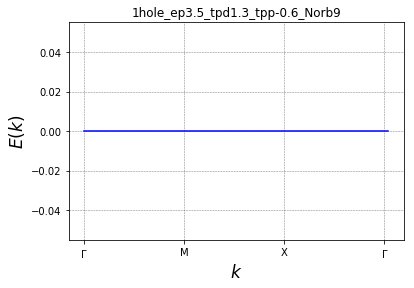

In [1]:
%pylab inline

import math
import numpy as np
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
import sympy as sp
from sympy import Matrix
sys.path.append('../../src/')

from pylab import *
from hamiltonian import Parameters

M_PI = math.pi
ed = 0
ep = 3.5
tpd = 1.3
tpp = -0.6

# sigma and pi bonding for 9 orbital case
pps = 0.3
ppp = 1.0

eta = 0.1
Norb = 9
fname = 'onehole_ep'+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+'_Norb'+str(Norb)
sa, sb, ca, cb= sp.symbols('sa sb ca cb')

if Norb==3:
    # d_x2-y2 and px,py
    M=Matrix( [[ed,          2*tpd*sa,       -2*tpd*sb],\
               [2*tpd*sa,    ep,             -4*tpp*sa*sb], \
               [-2*tpd*sb,  -4*tpp*sa*sb,       ep]] )
elif Norb==7:
    # 5 d-orbitals and px,py
    M=Matrix( [[ed,            0,            0,      0,    0,   2*tpd*sa,         -2*tpd*sb],\
               [0,            ed,            0,      0,    0,   2*tpd/sqrt(3)*sa,  2*tpd/sqrt(3)*sb],\
               [0,             0,           ed,      0,    0,     0,               0], \
               [0,             0,            0,     ed,    0,     0,               0], \
               [0,             0,            0,      0,   ed,     0,               0], \
               [2*tpd*sa,  2*tpd/sqrt(3)*sa, 0,      0,    0,     ep,             -4*tpp*sa*sb], \
               [-2*tpd*sb, 2*tpd/sqrt(3)*sb, 0,      0,    0,  -4*tpp*sa*sb,       ep]] )
elif Norb==9:
    # 5 d-orbitals and px1,py1,px2,py2
    a = sp.S(pps+ppp)
    b = sp.S(pps-ppp)
    c = 3**(sp.S(1)/2)
    S0 = sp.S(0)
    Sed = sp.S(ed)
    Sep = sp.S(ep)
    M=Matrix( [[Sed,            S0,   S0,    S0,    S0,   2*tpd*sa,      S0,       S0,     -2*tpd*sb],\
               [S0,            Sed,   S0,    S0,    S0,   2*tpd*sa/c,    S0,       S0,      2*tpd*sb/c],\
               [S0,             S0,   Sed,   S0,    S0,     S0,        -tpd*sa,  -tpd*sb,     S0], \
               [S0,             S0,   S0,    Sed,    S0,     S0,           S0,       S0,         S0], \
               [S0,             S0,   S0,    S0,   Sed,     S0,           S0,       S0,         S0], \
               [2*tpd*sa,  2*tpd*sa/c,    S0,    S0,    S0,    Sep,           S0,    -4*ca*cb*a, -4*ca*cb*b], \
               [S0,             S0, -tpd*sa,   S0,    S0,     S0,          Sep,    -4*ca*cb*b, -4*ca*cb*a], \
               [S0,             S0, -tpd*sb,   S0,    S0,  -4*ca*cb*a,  -4*ca*cb*b,  Sep,         S0], \
               [-2*tpd*sb, 2*tpd*sb/c,    S0,    S0,    S0,  -4*ca*cb*b,  -4*ca*cb*a,   S0,        Sep]] )
    
###################################################
#D = M.eigenvals()
# below is another more efficient way for eigenvalue problem
lam = sp.symbols('lambda')
cp = sp.det(M - lam * sp.eye(Norb))
#D = sp.roots(sp.Poly(cp, lam))
print cp
D = sp.solve(cp, lam, rational=True)
print D
###################################################
Nband = len(D)
Ek = []
for i in range(0,Nband):
    Ek.append(D[i])

Ms = ['-b','-r','-g','-m','-k','-c','-y']
Npts = 50.
# loop over band
for i in range(0,Nband):
    kxs = []; kys = []; Ekval = []
    # from (0,0) to (pi,pi)
    for kx in np.arange(0,M_PI+M_PI/Npts,M_PI/Npts):
        ky = kx
        kxs.append(kx)
        kys.append(ky)
        a = sin(kx/2.0)
        b = sin(ky/2.0)
        if Norb==9:
            c = cos(kx/2.0)
            d = cos(ky/2.0)
            va = Ek[i].subs([(sa,a),(sb,b),(ca,c),(cb,d)])
        else:
            va = Ek[i].subs([(sa,a),(sb,b)])
        val = complex(va.evalf())  # change data type from array to complex number
        Ekval.append(real(val))

    # from (pi,pi) to (pi,0)
    for ky in np.arange(M_PI,-M_PI/Npts,-M_PI/Npts):
        kx = M_PI
        kxs.append(kx)
        kys.append(ky)
        a = sin(kx/2.0)
        b = sin(ky/2.0)
        if Norb==9:
            c = cos(kx/2.0)
            d = cos(ky/2.0)
            va = Ek[i].subs([(sa,a),(sb,b),(ca,c),(cb,d)])
        else:
            va = Ek[i].subs([(sa,a),(sb,b)])
        val = complex(va.evalf())  # change data type from array to complex number
        Ekval.append(real(val))

    # from (pi,0) to (0,0)
    for kx in np.arange(M_PI,-M_PI/Npts,-M_PI/Npts):
        ky = 0.0
        kxs.append(kx)
        kys.append(ky)
        a = sin(kx/2.0)
        b = sin(ky/2.0)
        if Norb==9:
            c = cos(kx/2.0)
            d = cos(ky/2.0)
            va = Ek[i].subs([(sa,a),(sb,b),(ca,c),(cb,d)])
        else:
            va = Ek[i].subs([(sa,a),(sb,b)])
        val = complex(va.evalf())  # change data type from array to complex number
        Ekval.append(real(val))

    plt.plot(arange(0,len(kxs)),Ekval,Ms[i])

xlabel('$k$',fontsize=17)
ylabel('$E(k)$',fontsize=17)
xticks((0,Npts,2.*Npts,3.*Npts), (r'$\Gamma$','M','X',r'$\Gamma$'))
#text(0.45, 0.1, '(a)', fontsize=16)
title('1hole_ep'+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+'_Norb'+str(Norb))
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("Ek_"+fname+".pdf")